In [52]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the model classes
from model_local import LocalBalancedNetwork
from model_local_kernel import LocalBalancedNetworkKernel

# import class to generate inputs
from stimulus_generator import StimulusGenerator


In [53]:
# Define all parameters
params = {}
params['N'] = 100 # number of neurons
params['T'] = 50 # time of simulation (s)
params['D_mean'] = 1.0 # mean weight value
params['D_noise'] = 0.0 # SD noise in weights
params['tau'] = .2 # decay rate for filtered spike train (1/ms)
params['mu'] = 0.0 # quadratic cost term
params['F_max'] = 20 # maximum firing rate (mHz)
params['F_min'] = 0 # minimum firing rate (mHz)
params['alpha'] = 10 # steepness of the sigmoid (hard-soft threshold)
params['tdel'] = 0 # time delay in time bins
params['dt'] = 0.001 # size of timestep 

In [54]:
# inititialize network
network = LocalBalancedNetwork(params)
network_kernel = LocalBalancedNetworkKernel(params)

# initalize stimulus class
stim_gen = StimulusGenerator(params)

In [55]:
# generate stimulus (uncomment and run to try other stimulus)

# stimulus = stim_gen.stimulus_sin()
stimulus = stim_gen.stimulus_convolved_random()
# stimulus = stim_gen.stimulus_abs_sin()
# stimulus = stim_gen.stimulus_step(num_steps=5)
# stimulus = stim_gen.stimulus_step_random(num_steps=5)
# stimulus = stim_gen.stimulus_constant(y_value=5)

# you can generate your own stimulus. Just make sure it is of len( time/dt + tdel * dt )

In [56]:
# run network (local framework with exponential decay filter)
s, r, v, estimate, threshold, D, spike_idx_neurons, error = network.run(stimulus)

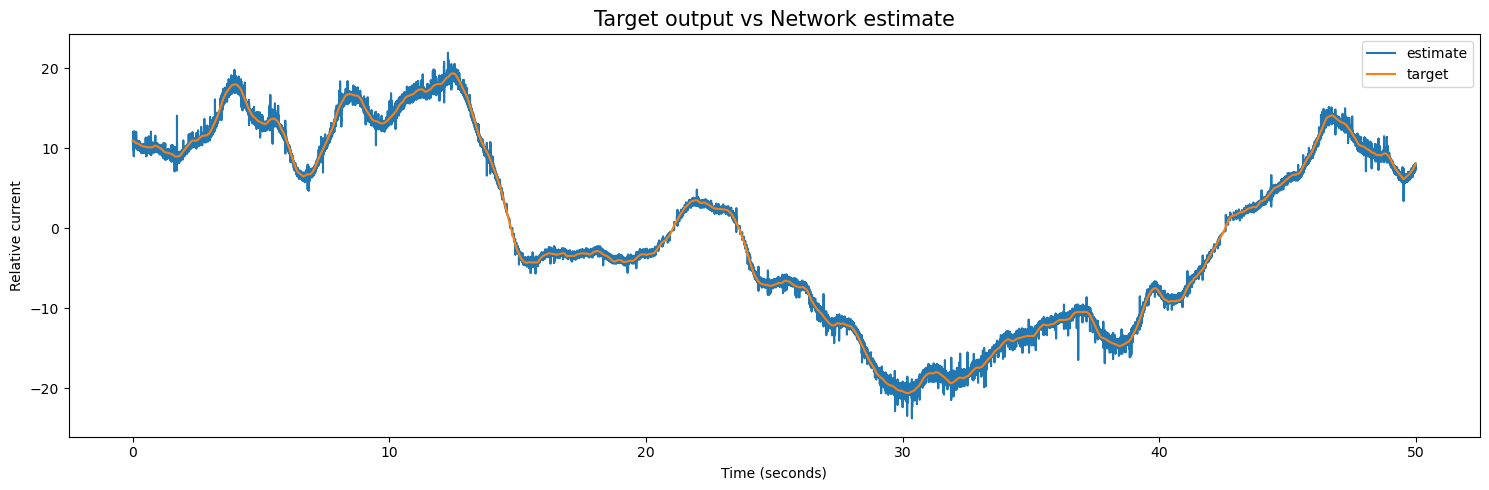

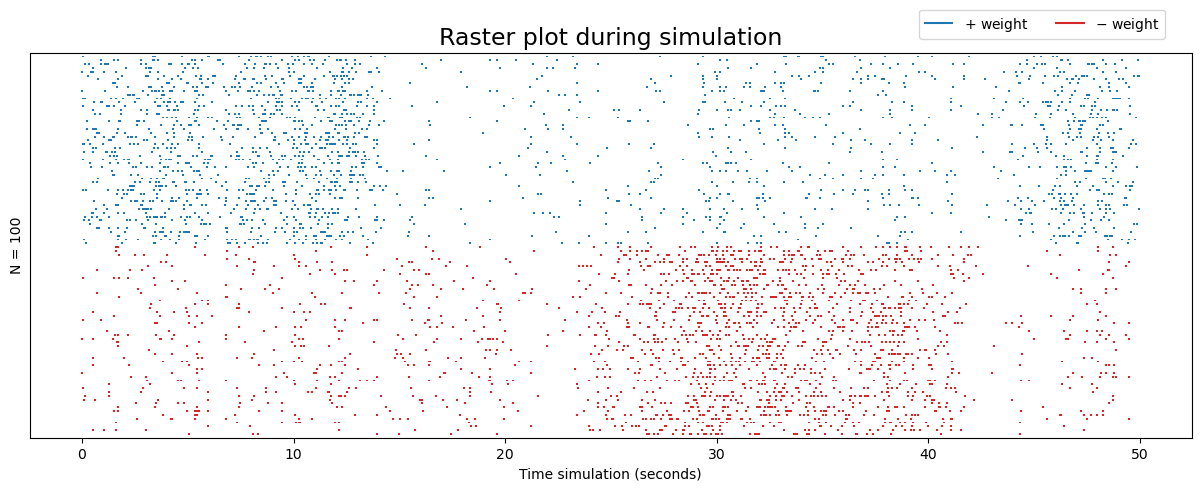

In [57]:
# plot some results
network.plot_target_vs_estimate()
network.plot_raster()

#### Changing the decay function of the spikes

Here we can make things a bit more interesting by changing the function we use to convolve our spike train, which will change the shape of our spikes. In the previous implementation, I used an exponential decay kernel, here you can explore other kernels such as the bimodal and gaussian. I also include the exponential decay to compare them with the others. If you feel adventurous you can make your own kernels (just make sure it has the same shape as the ones provided here).

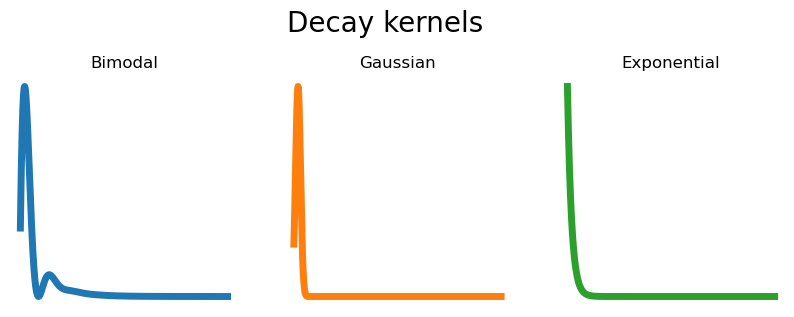

In [58]:
# run network (local framework with customised decay filter)

# generate filter (kernel)
kernel_bimodal = network_kernel.generate_kernel('bimodal')
kernel_gaussian = network_kernel.generate_kernel('gaussian')
kernel_exponential = network_kernel.generate_kernel('exponential')

# Visualize the kernels
fig, axs = plt.subplots(1,3, figsize=(10,3))
axs[0].plot(kernel_bimodal, lw=5)
axs[0].set(title='Bimodal')
axs[1].plot(kernel_gaussian, c='C1', lw=5)
axs[1].set(title='Gaussian')
axs[2].plot(kernel_exponential, c='C2', lw=5)
axs[2].set(title='Exponential')

for i in range(3):
    axs[i].set(xticks=[], yticks=[])
    sns.despine(left=True, bottom=True, ax=axs[i])

fig.suptitle('Decay kernels', fontsize=20, y=1.1)
plt.show()


In [61]:
results_kernel = network_kernel.run(stimulus, kernel_bimodal)

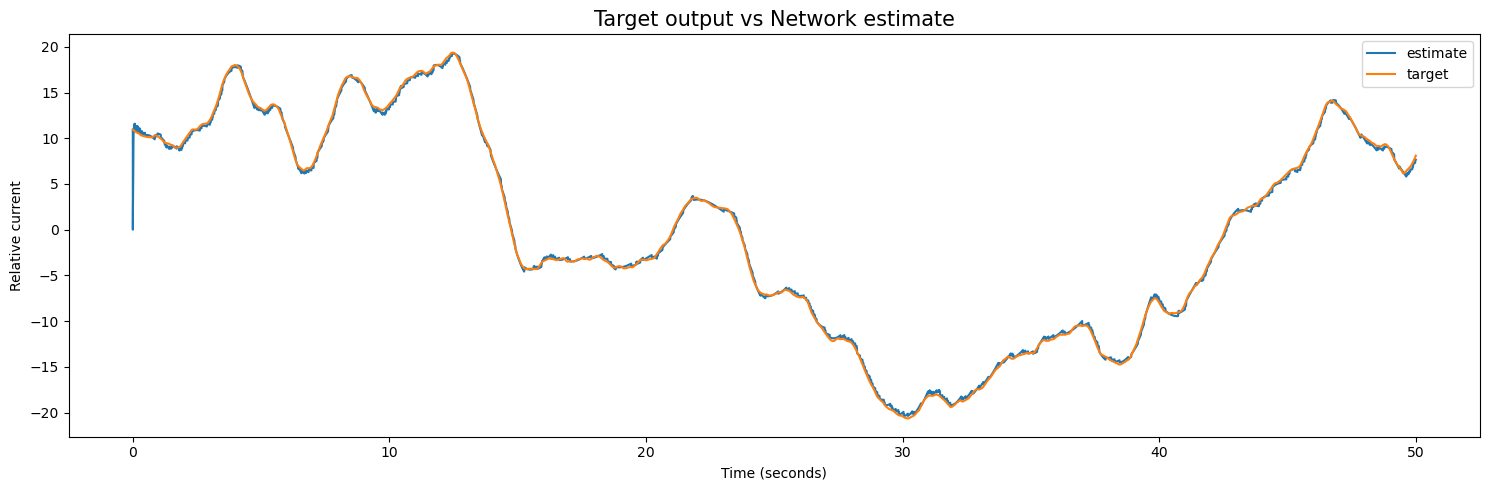

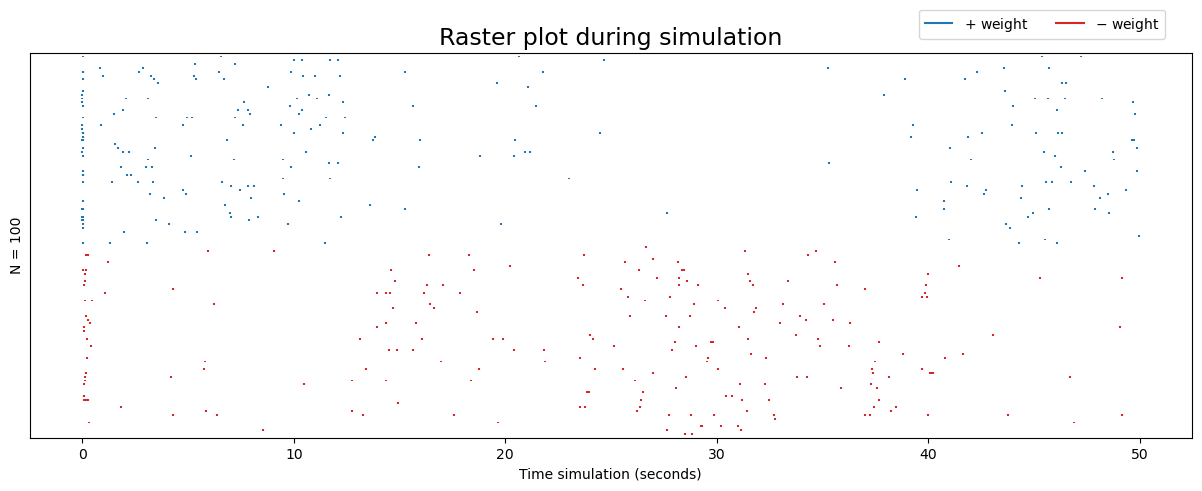

MSE mean(std) using an exponential decay 0.202(0.444)
MSE mean(std) using an biodal decay kernel 0.087(1.258)


In [65]:
# plot some results
network_kernel.plot_target_vs_estimate()
network_kernel.plot_raster()

Note how, by just visually inspecting the scatter plots, we can see that if we use the bimodal kernel, the network uses way less spikes compared to the exponential decay. If we look at the MSE it also seems that the bimodal decay is doing better (statistics are missing, this is just to get an idea).

In [66]:
print('MSE mean(std) using an exponential decay', f'{round(error.mean(),3)}({round(error.std(),3)})')
print('MSE mean(std) using an biodal decay kernel', f'{round(results_kernel[-1].mean(),3)}({round(results_kernel[-1].std(),3)})')

MSE mean(std) using an exponential decay 0.202(0.444)
MSE mean(std) using an biodal decay kernel 0.087(1.258)


If you are interested in a more thorough analysis on network performance for different parameters, feel free to take a look at my thesis referenced at the readme.md file.